In [87]:
import pandas as pd; 
import matplotlib.pyplot as plt; 
import sklearn; 
import numpy as np; 
import scipy; 
import seaborn as sns

train = pd.read_csv("/Users/lucasmazza/Desktop/KaggleComp/train.csv")
test = pd.read_csv("/Users/lucasmazza/Desktop/KaggleComp/test.csv")

In [86]:
#preview our data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,nan,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.583824
1,2,20,RL,80.0,9600,Pave,nan,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.573300
2,3,60,RL,68.0,11250,Pave,nan,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.589054
3,4,70,RL,60.0,9550,Pave,nan,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.553297
4,5,60,RL,84.0,14260,Pave,nan,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.597433


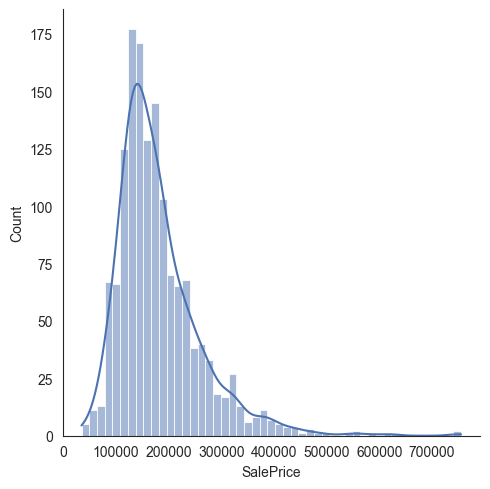

In [42]:
sns.displot(train['SalePrice'], color="b",kde = True);
#it seems like our data is right skew, lets take a better look into it
#to see what kind of transformation to preform


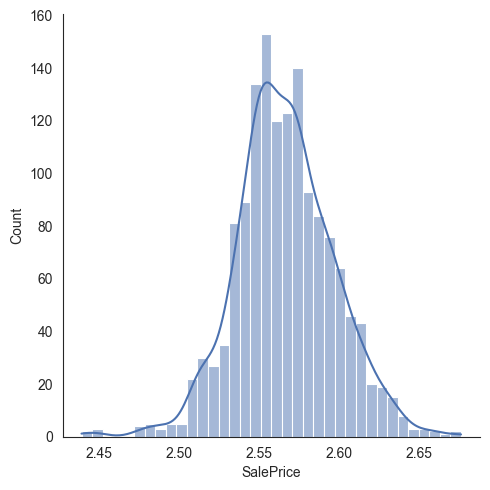

In [51]:
#perfrom a transformation here (log)
train['SalePrice'] = np.log(1 + train['SalePrice'])
#attempt to plot again 
sns.displot(train['SalePrice'], color="b",kde = True);
#this data looks much more normal 

In [41]:
#lets create scatter plots for the nemericals
numeric_cols = train.select_dtypes(include=["float64", "int64"]).columns.tolist()
print(numeric_cols)
numericFeutures = train[numeric_cols]
numericFeutures.head()


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


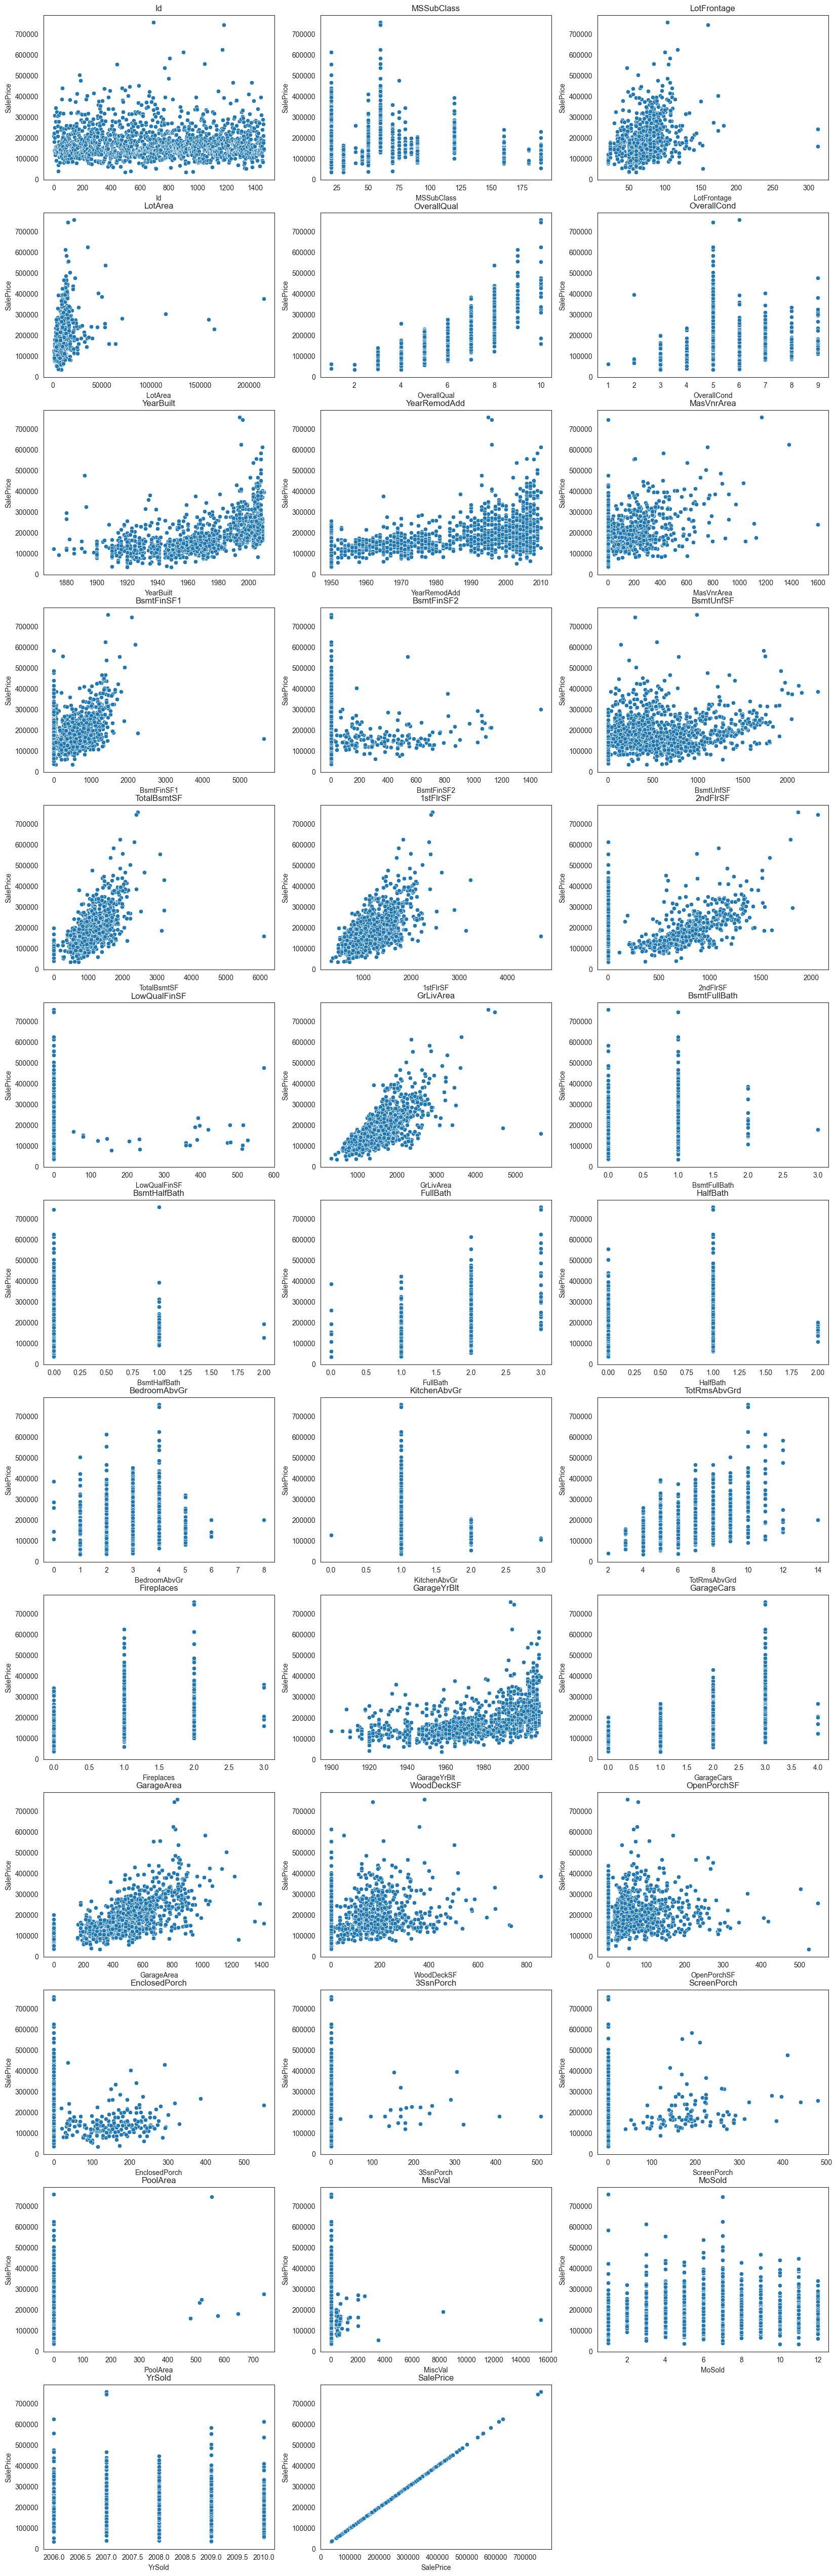

In [88]:

# Plot scatterplot for each feature on a specific subplot

nrows = (len(numeric_cols) + 2) // 3  # Round up to the nearest integer
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Plot scatterplot for each feature on a specific subplot
for idx, feature in enumerate(numeric_cols):
    row_idx = idx // ncols
    col_idx = idx % ncols
    sns.scatterplot(x=feature, y="SalePrice", data=train, ax=axs[row_idx, col_idx])
    axs[row_idx, col_idx].set_title(feature)
    
# Remove any unused subplots
for i in range(len(numeric_cols), nrows*ncols):
    row_idx = i // ncols
    col_idx = i % ncols
    fig.delaxes(axs[row_idx, col_idx])

In [113]:
#explore nan values 
nan_counts = train.isna().sum()
nonzero_nans_cols = nan_counts[nan_counts != 0].index
nonzero_nans_cols = nonzero_nans_cols.to_list()
nan_train = train[nonzero_nans_cols]
print(nan_train.isna().sum())

Series([], dtype: float64)


In [116]:
#we want to be able to do these trainsformations to the features of the test too, so we need to account for that in the feature transformation 
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2910, 80)

In [112]:
#fixing nan values
#LotFrontage, meadian (resistant to outliers)
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#there are alot of features that have nan instead of just saying that the feature is not included in the house
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['PoolQC'] = train['PoolQC'].fillna('None')
train[['Fence','GarageFinish','GarageCond','GarageQual','GarageYrBlt','GarageType', 'FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond', 'BsmtQual','Alley']] = train[['Fence','GarageFinish','GarageCond','GarageQual','GarageYrBlt','GarageType', 'FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond', 'BsmtQual','Alley']].fillna('None')
#the remaining NA columns are just bad data it seems like so we can remove them with little impact
train = train.dropna()
#all nan values are taken care of

In [115]:
#now lets check the distribution of the numerical features
#fixing the columns that have values that are stored as ints that should be strings 
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object